|--- petal width (cm) <= 0.75
|   |--- class: 0
|--- petal width (cm) >  0.75
|   |--- petal length (cm) <= 4.85
|   |   |--- petal width (cm) <= 1.70
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.70
|   |   |   |--- sepal width (cm) <= 3.00
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.00
|   |   |   |   |--- class: 1
|   |--- petal length (cm) >  4.85
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 5.05
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  5.05
|   |   |   |   |--- sepal length (cm) <= 6.05
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.05
|   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2



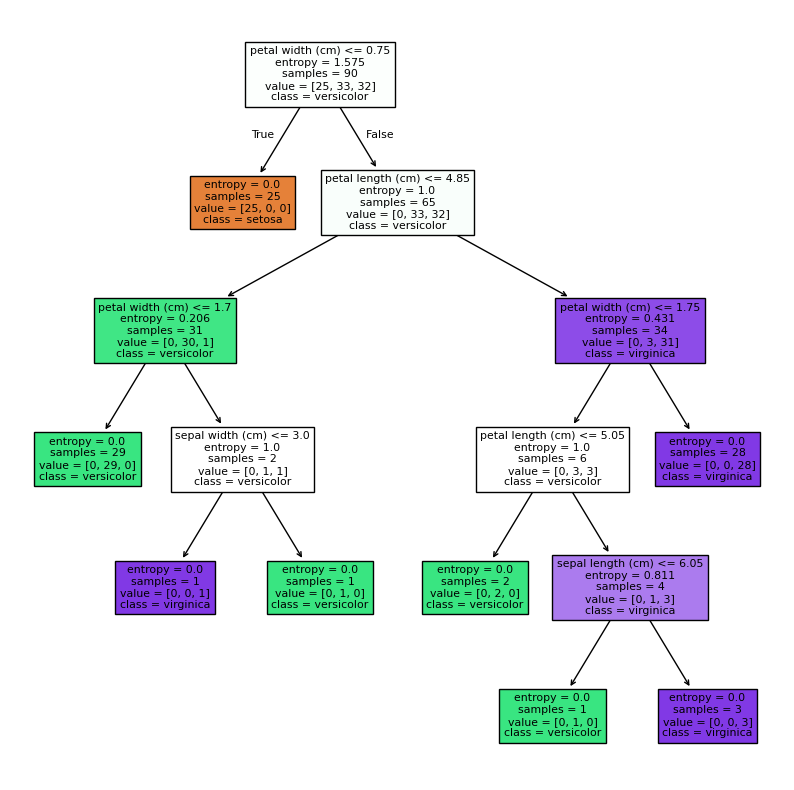

<Figure size 500x500 with 0 Axes>

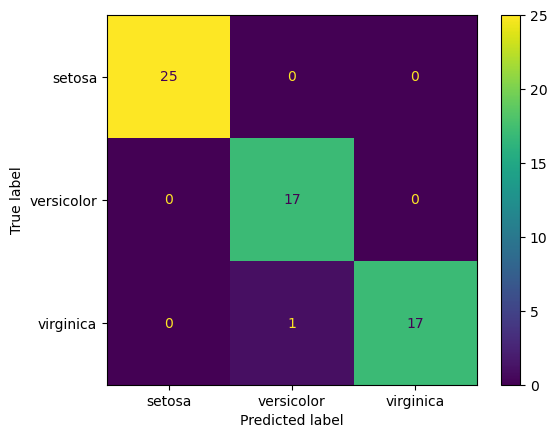

Accuracy rate = 0.98
Precisoin rate = 0.98
Recall rate = 0.98


In [ ]:
# 利用 Decision Tree 非線性模型來區分資料


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , accuracy_score , precision_score , recall_score
import matplotlib.pyplot as plt


# 1. 先建立訓練及測試資料集

iris = load_iris()

x = iris["data"]
y = iris["target"]

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.4)


# 2. 進行模型訓練

# 決策樹基本上就是用所有特徵做出不同條件去測試哪個特徵的條件可以有最大訊息增益

# 也就是各個篩選條件節點產生的分類結果能得到最低不確定性 ( 或最純，分類很明確 ) 的商，或者說得到最低不確定或最純的結果

# 模型還可以調 max_depth ( 最多幾層 )，節點要分出左右路徑的最少樣本數 min_sample_split ( 本身的樣本，太少就不分，避免過擬合 )

model = DecisionTreeClassifier(criterion="entropy")

model.fit(x_train,y_train)


# 3. 產出模型結果

# 文字的模型敘述，比較不直覺

report = export_text(model,feature_names=iris["feature_names"])

print(report)

# 畫圖的模型呈現

plt.figure(figsize=(10,10))

# 要給定特徵的名稱和目標變數值的名稱，這樣才會顯示名稱而非數字。filled 則是可以讓方框有底色

tree.plot_tree(model,feature_names=iris["feature_names"],class_names=iris["target_names"],filled=True)

# sklearn 有封裝 matplotlib 的功能在其模組裡，所以可以直接呼叫使用

plt.show()


# 4. 衡量模型的準確度

# 先算出 y_prediction

y_prediction = model.predict(x_test)

# 再做出 confusion matrix

matrix = confusion_matrix(y_test,y_prediction)

# 要多一個 ConfusionMatrixDisplay 來將目標變數值給予名稱

display = ConfusionMatrixDisplay(matrix,display_labels=iris["target_names"])

# confusion matrix 也一樣，可以直接呼叫 matplotlib 使用

plt.figure(figsize=(5,5))

display.plot()

plt.show()

# 算出 Accuracy rate , Precision rate 及 Recall rate

a = accuracy_score(y_test,y_prediction)

# precision score 和 recall score 要記得給 average 才能計算

# weighted 是比較常用的，micro 則是單純計算全體的 TP , FP 等等，不看個別組別

p = precision_score(y_test,y_prediction,average="micro")

r = recall_score(y_test,y_prediction,average="micro")

print(f"Accuracy rate = {round(a,ndigits=2)}")

print(f"Precisoin rate = {round(p,ndigits=2)}")

print(f"Recall rate = {round(r,ndigits=2)}")

